# Figure 2D

In [1]:
# required libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [2]:
def plot_create():
    #plt.title('S phase reduction dominates spinal cord outgrowth', y=1.05, size=60)    
    ax.legend(loc='upper left', facecolor='white')    
    plt.xlabel('Time (days)')
    plt.ylabel('Outgrowth' + ' (' + r'$\mu$'+'m)')
    plt.xlim(-0.2,8.2)
    plt.ylim(-50,2500)
    fig = plt.gcf()
    fig.set_size_inches(18.5, 12.5)
    plt.rcParams.update({'font.size': 24})
    filename = "./" + "Fig_2D.png"
    fig.savefig(filename, dpi=300, bbox_inches='tight')

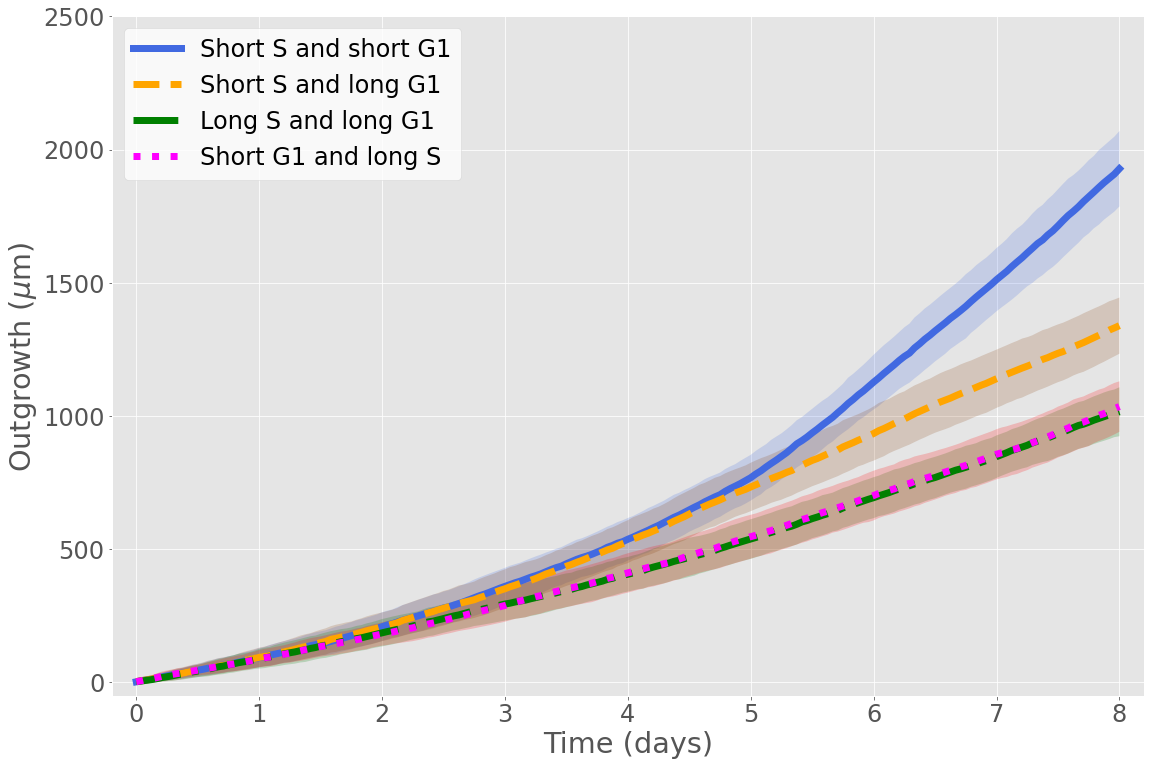

In [4]:
n0_mean,n0_std = 196,2 # n0 mean and standar deviation
l_mean,l_std = 828,30      # lambda mean and standar deviation
tau_mean,tau_std = 85,12   # tau mean and standar deviation

fig = plt.figure()
ax = fig.add_subplot(111)

# Both phases working
root = "../main/simulations/"
model = 'outgrowth/'
parameters = 'n0='+str(n0_mean)+'\n'+'l='+str(l_mean)+'\n'+'tau='+str(tau_mean)+'/'
path = root+model+parameters

all_seeds = []
files = os.listdir(path)
for seed in files:    
    opened_file = open(path+seed)
    data = pd.read_csv(opened_file, delimiter=',')
    data.set_index(['time', 'id'], inplace=True)
    outgrowth = data.groupby(level='time')['position'].max()
    all_seeds.append(outgrowth)
all_seeds = pd.concat(all_seeds, ignore_index=True, axis=1)
outgrowth_mean = np.asarray(all_seeds.mean(axis=1))
outgrowth_mean = outgrowth_mean[np.logical_not(np.isnan(outgrowth_mean))]
outgrowth_std = np.asarray(all_seeds.std(axis=1))
outgrowth_std = outgrowth_std[np.logical_not(np.isnan(outgrowth_std))]
time = outgrowth.index/24

ax.plot(time, outgrowth_mean, color='royalblue',linestyle='solid', linewidth=7, label="Short S and short G1")
ax.fill_between(time, outgrowth_mean-outgrowth_std, outgrowth_mean+outgrowth_std, facecolor='royalblue', alpha=0.2)

# Only G1 phase working
root = "../alternative_models/simulations/phases/"
model = 'only_S/'
parameters = 'n0='+str(n0_mean)+'\n'+'l='+str(l_mean)+'\n'+'tau='+str(tau_mean)+'/'
path = root+model+parameters

all_seeds = []
files = os.listdir(path)
for seed in files:    
    opened_file = open(path+seed)
    data = pd.read_csv(opened_file, delimiter=',')
    data.set_index(['time', 'id'], inplace=True)
    outgrowth = data.groupby(level='time')['position'].max()
    all_seeds.append(outgrowth)
all_seeds = pd.concat(all_seeds, ignore_index=True, axis=1)
outgrowth_mean = np.asarray(all_seeds.mean(axis=1))
outgrowth_mean = outgrowth_mean[np.logical_not(np.isnan(outgrowth_mean))]
outgrowth_std = np.asarray(all_seeds.std(axis=1))
outgrowth_std = outgrowth_std[np.logical_not(np.isnan(outgrowth_std))]
time = outgrowth.index/24

ax.plot(time, outgrowth_mean, color='orange',linestyle='dashed', linewidth=7, label="Short S and long G1")
ax.fill_between(time, outgrowth_mean-outgrowth_std, outgrowth_mean+outgrowth_std, facecolor='saddlebrown', alpha=0.2)


# Proliferation impeded outgrowth
root = "../main/simulations/"
model = 'impediment/'
parameters = 'n0='+str(n0_mean)+'/'
path = root+model+parameters

all_seeds = []
files = os.listdir(path)
for seed in files:    
    opened_file = open(path+seed)
    data = pd.read_csv(opened_file, delimiter=',')
    data.set_index(['time', 'id'], inplace=True)
    outgrowth = data.groupby(level='time')['position'].max()
    all_seeds.append(outgrowth)
all_seeds = pd.concat(all_seeds, ignore_index=True, axis=1)
outgrowth_mean = np.asarray(all_seeds.mean(axis=1))
outgrowth_mean = outgrowth_mean[np.logical_not(np.isnan(outgrowth_mean))]
outgrowth_std = np.asarray(all_seeds.std(axis=1))
outgrowth_std = outgrowth_std[np.logical_not(np.isnan(outgrowth_std))]
time = outgrowth.index/24

ax.plot(time, outgrowth_mean, color='g',linestyle='dashdot', linewidth=7, label="Long S and long G1",)
ax.fill_between(time, outgrowth_mean-outgrowth_std, outgrowth_mean+outgrowth_std, facecolor='g', alpha=0.2)

# Only S phase working
root = "../alternative_models/simulations/phases/"
model = 'only_G1/'
parameters = 'n0='+str(n0_mean)+'\n'+'l='+str(l_mean)+'\n'+'tau='+str(tau_mean)+'/'
path = root+model+parameters

all_seeds = []
files = os.listdir(path)
for seed in files:    
    opened_file = open(path+seed)
    data = pd.read_csv(opened_file, delimiter=',')
    data.set_index(['time', 'id'], inplace=True)
    outgrowth = data.groupby(level='time')['position'].max()
    all_seeds.append(outgrowth)
all_seeds = pd.concat(all_seeds, ignore_index=True, axis=1)
outgrowth_mean = np.asarray(all_seeds.mean(axis=1))
outgrowth_mean = outgrowth_mean[np.logical_not(np.isnan(outgrowth_mean))]
outgrowth_std = np.asarray(all_seeds.std(axis=1))
outgrowth_std = outgrowth_std[np.logical_not(np.isnan(outgrowth_std))]
time = outgrowth.index/24

ax.plot(time, outgrowth_mean, color='magenta',linestyle='dotted', linewidth=7, label="Short G1 and long S")
ax.fill_between(time, outgrowth_mean-outgrowth_std, outgrowth_mean+outgrowth_std, facecolor='r', alpha=0.2)

plot_create()